In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector, plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
import numpy as np

## Separable State

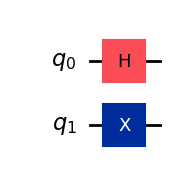

In [2]:
qc_separable = QuantumCircuit(2)
qc_separable.h(0)
qc_separable.x(1)

display(qc_separable.draw(output='mpl'))

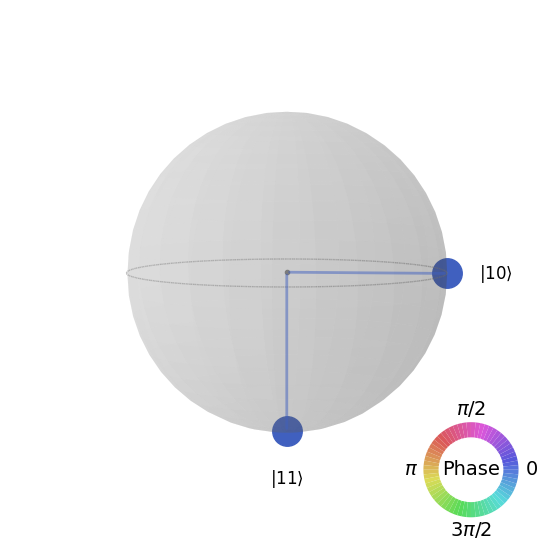

In [3]:
state_separable = Statevector.from_instruction(qc_separable)
plot_state_qsphere(state_separable)

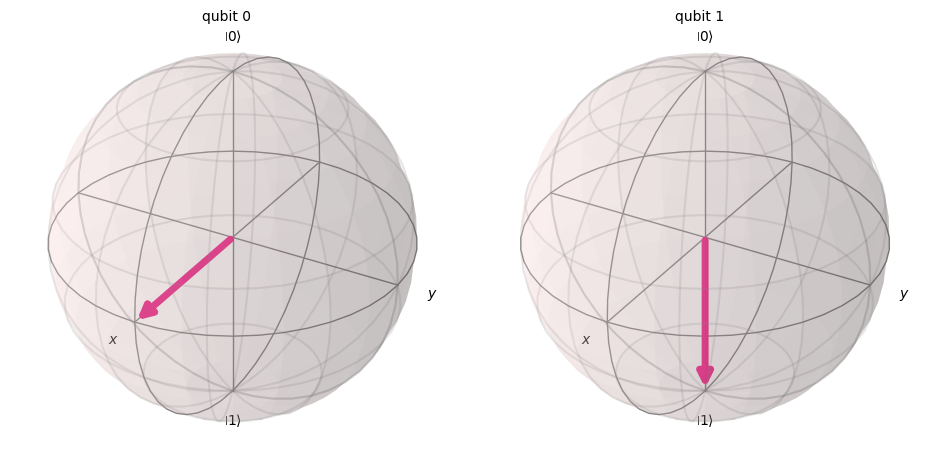

In [4]:
state_separable = Statevector.from_instruction(qc_separable)
plot_bloch_multivector(state_separable)

## Entangled State

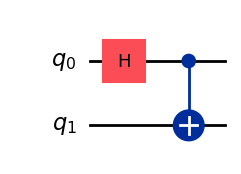

In [5]:
qc_entangled = QuantumCircuit(2)
qc_entangled.h(0)
qc_entangled.cx(0, 1)

display(qc_entangled.draw(output='mpl'))

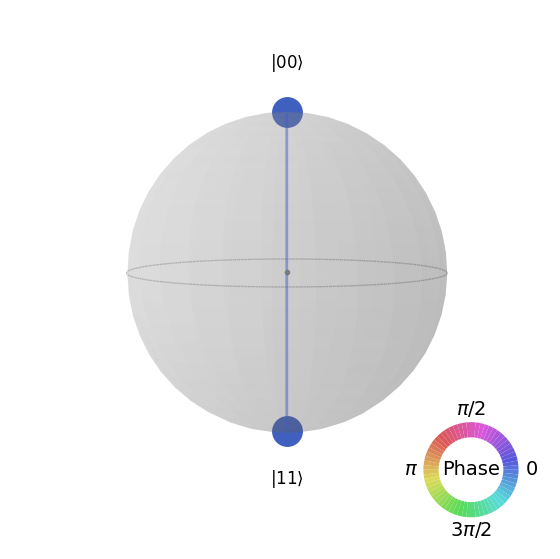

In [6]:
state_entangled = Statevector.from_instruction(qc_entangled)
plot_state_qsphere(state_entangled)

In [7]:
qc_entangled.measure_all()

In [8]:
simulator = AerSimulator()

In [9]:
job = simulator.run(qc_entangled, shots=1000)
result = job.result()
counts = result.get_counts(qc_entangled)

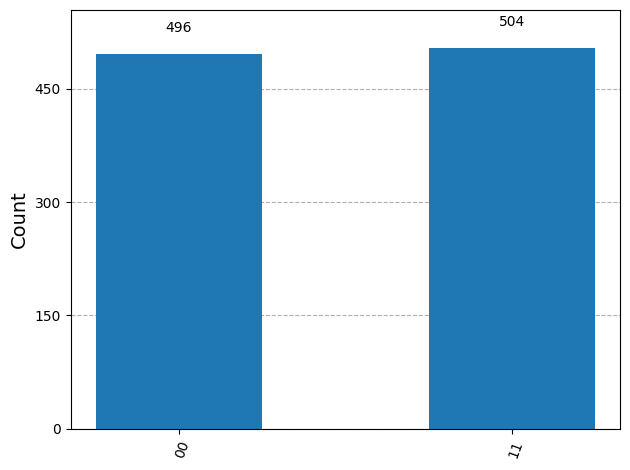

In [10]:
# Display histogram
plot_histogram(counts)

In [12]:
def state_eval(n, quantum_circuit):
    """ 
    Evaluates a n-qubit circuit and prints the full quantum state including superpositions and phases
    """
    print(f"{'Input':<10} | {'Output State Vector'}")
    print("-" * 50)

    for i in range(2**n):
        qc_init = QuantumCircuit(n)
        input_str = format(i, f'0{n}b')
        
        for qubit_index, bit in enumerate(reversed(input_str)):
            if bit == '1':
                qc_init.x(qubit_index)
        
        full_circuit = qc_init.compose(quantum_circuit)
        state = Statevector(full_circuit)
        raw_dict = state.to_dict(decimals=5)
        state_parts = []
        for basis_state, amp in raw_dict.items():
            if np.isclose(amp.imag, 0):
                amp_str = f"{amp.real:.2f}"
            else:
                amp_str = f"{amp:.2f}"
            state_parts.append(f"{amp_str}|{basis_state}>")
            
        output_str = " + ".join(state_parts)
        print(f"|{input_str + '>':<9} | {output_str}")

In [17]:
n = 2
qc = QuantumCircuit(n)
qc.h(0) 
qc.cx(0, 1) 

state_eval(n, qc)

Input      | Output State Vector
--------------------------------------------------
|00>       | 0.71|00> + 0.71|11>
|01>       | 0.71|00> + -0.71|11>
|10>       | 0.71|01> + 0.71|10>
|11>       | -0.71|01> + 0.71|10>
